<a href="https://colab.research.google.com/github/kkgh2024/breast-cancer-project/blob/master/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Classification with CNNs

## Motivation

Invasive ductal carcinoma (IDC) is a common and dangerous type of breast cancer, making up about 80% of cases. It spreads quickly and can be hard to detect accurately. Doctors usually take tissue samples with a biopsy to check for IDC or other types of cancer. This testing is complex and depends a lot on the doctor's experience and equipment, so it takes time and might not always be consistent.

Using deep learning could change how we diagnose IDC by automating the process of finding cancer cells in tissue samples. By using large collections of images from different hospitals, analyzed by many experts, we could create a strong system to help diagnose cancer more efficiently. This technology could lessen the need for specialized doctors in places where they are scarce.

**Breast Cancer Statistics:**
In 2020, the World Health Organization (WHO) reported  [2.3 million](https://www.who.int/news-room/fact-sheets/detail/breast-cancer)cases of breast cancer among women, leading to 685,000 deaths globally. By the end of that year, about 7.8 million women had been diagnosed with breast cancer in the preceding five years, making it the most common cancer worldwide.Globally, female breast cancer ranks as the fifth leading cause of death.

##  Challenge:

Given a patient and a patch of tissue slice, predict whether it contains IDC or not, assisting with automatic tumor detection.

In this project, I used a Convolutional Neural Network (CNN) for the detection of breast cancer, treating it as a classification problem.







## Table of Contents

- [Dataset](#dataset)
  - [Import Data from Kaggle](#import-data-from-kaggle)
- [Data Preparation](#data-preparation)  
  - [Import Libraries](#import-libraries)
  - [Exploring the data structure](exploring-the-data-structure)
     - [How many patients do we have?](how-many-patients-do-we-have)
     - [How many patches do we have in total?](how-many-patches-do-we-have)
     - [Storing the image path, patient ID,and target](#storing-the-image)
-[Data Visualization](#data-visualization)
  - [Visualizing Healthy and Unhealthy Patches](#visualizing-healthy-and-)
    - [Cancerous Patches](#cancerous-patches)
    - [Healthy Patches](#healthy-patches)
  -[Visualize the breast tissue](#visualize-the-breast-tissue)
    - [Extracting X and Y Coordinates from Breast Tissue](#extracting-x-and-y)
    - [Visualizing Breast Cancer Tissue Coordinates for Multiple Patients]()
    - [Visualizing Breast Cancer Tissue Coordinates for Patient "12880"]()
    
   
- [Modeling Using CNN](#modeling-using-cnn)  
 - [Distribution of Target Variable](#distribution-of-target-variable)
 - [Extract balanced data from our dataset](#extract-balanced-data)  
 - [Creating a new DataFrame with columns for PNG images](#png-images)
 - [Split the Data](#split-the-data)
 - [Convolutional Neural Network Architecture.](#convolutional-neural-network)
    - [The base model](#the-base-model)
    - [Add customer layers](#customer-layers)
- [The Model's Performance](#the-model-performance)
- [Tuning Parameters](#tuning-parameters)
- [Conclusion](#conclusion)
  

## Dataset


I'am  using  a dataset from Kaggle, accessible [here](https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images/code?datasetId=7415&sortBy=voteCount). Here are some key properties of this dataset:

The original dataset consisted of 162 slide images of breast cancer specimens, scanned at a magnification of 40x. To make them more manageable, 277,524 patches, each measuring 50×50 pixels, were extracted from these images. These patches include regions containing Invasive Ductal Carcinoma (IDC), facilitating more efficient processing and analysis.


*   198,738 negative examples (i.e., no breast cancer)
*   78,786 positive examples (i.e., indicating breast cancer)



Each image in the dataset is assigned a unique filename structure, such as:

### Import Data from Kaggle

In [1]:
#Upload the "kaggle.jason" file using upload widget
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ghezalkhalida","key":"6fc6e2cbeb7ce838f0b76beb7d609f58"}'}

In [2]:
#Create "~/.kaggle" directory
!mkdir ~/.kaggle

#Move "kaggle.json" file to this directory
!mv kaggle.json ~/.kaggle/

#Change the file access rights to the current user only
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/breast-histopathology-images
License(s): CC0-1.0
100% 3.10G/3.10G [01:42<00:00, 33.8MB/s]
100% 3.10G/3.10G [01:42<00:00, 32.5MB/s]


In [4]:
#Create a directory "dataset" to unzip the file there
!mkdir dataset

In [5]:
#Unzip the dataset quitely using "qq" flag
# to the "dataset" directory using "d" flag
!unzip -qq "/content/breast-histopathology-images.zip" -d "/content/dataset"

## Preparation Data

### Import Libraries

In [6]:
#Import necessary libraries
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_datasets as tfds

import os, shutil, pathlib, glob
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import random
SEED = 144
random.seed(SEED)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_datasets as tfds
import os, shutil, pathlib, glob
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import pandas as pd
import random
SEED = 144
random.seed(SEED)
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import itertools
import shutil
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring the data structure

In [7]:
from os import listdir

files = listdir("/content/dataset")
print(len(files))

280


### How many patients do we have?


In [8]:

folder = listdir("/content/dataset/IDC_regular_ps50_idx5/")
len(folder)

279

 ### How many patches do we have in total?

In [ ]:
total_images = 0
for n in range(len(folder)):
    patient_id = folder[n]
    for c in [0, 1]:
        patient_path = "/content/dataset/IDC_regular_ps50_idx5/" + patient_id
        class_path = patient_path + "/" + str(c) + "/"
        subfiles = listdir(class_path)
        total_images += len(subfiles)
total_images

277524

### Storing the image path, patient ID, and target

In [9]:
# Iterate over the folder names
data_list =[]
base_path = "/content/dataset/IDC_regular_ps50_idx5/"
for patient_id in folder:
    patient_path = os.path.join(base_path, patient_id)
    for c in [0, 1]:
        class_path = os.path.join(patient_path, str(c))
        subfiles = os.listdir(class_path)
        for image_path in subfiles:
            # Append a dictionary for each image to the list
            data_list.append({
                "patient_id": patient_id,
                "path": os.path.join(class_path, image_path),
                "target": c
            })

# Convert the list of dictionaries to a DataFrame
data = pd.DataFrame(data_list)

# Display the first few rows of the DataFrame
data.head()

,patient_id,path,target
0,14210,/content/dataset/IDC_regular_ps50_idx5/14210/0...,0
1,14210,/content/dataset/IDC_regular_ps50_idx5/14210/0...,0
2,14210,/content/dataset/IDC_regular_ps50_idx5/14210/0...,0
3,14210,/content/dataset/IDC_regular_ps50_idx5/14210/0...,0
4,14210,/content/dataset/IDC_regular_ps50_idx5/14210/0...,0


In [ ]:
data.shape

(277524, 3)

In [ ]:
# Count the number of positive and negative examples
total_counts = data['target'].value_counts()

# Extract the number of positive and negative examples
total_positive = total_counts.get(1, 0)
total_negative = total_counts.get(0, 0)

# Print the results
print(f"Total number of positive examples: {total_positive}")
print(f"Total number of negative examples: {total_negative}")

Total number of positive examples: 78786
Total number of negative examples: 198738


## Data Visualization

### Visualizing Healthy and Unhealthy Patches

#### Cancerous Patches

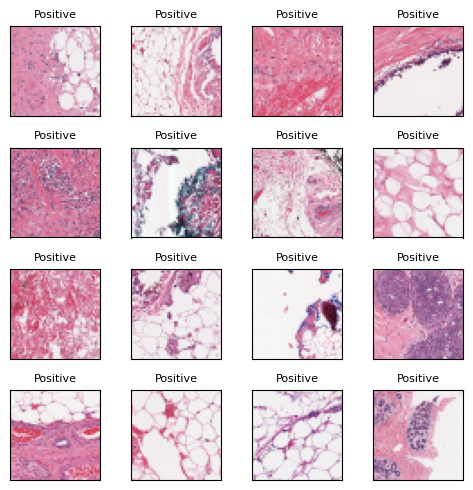

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from skimage.io import imread
data['target'] = data['target'].astype(int)
# Select random healthy (negative) and unhealthy (positive) patches
pos_selection = np.random.choice(data[data['target'] == 1].index.values, size=50, replace=False)
neg_selection = np.random.choice(data[data['target'] == 0].index.values, size=50, replace=False)


fig, ax = plt.subplots(4, 4, figsize=(5, 5))

for i in range(4):
    for j in range(4):
        idx = neg_selection[j + 4 * i]
        image = imread(data.loc[idx, "path"])
        ax[i, j].imshow(image)
        ax[i, j].grid(False)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_title('Positive', fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

###  Healthy Patches

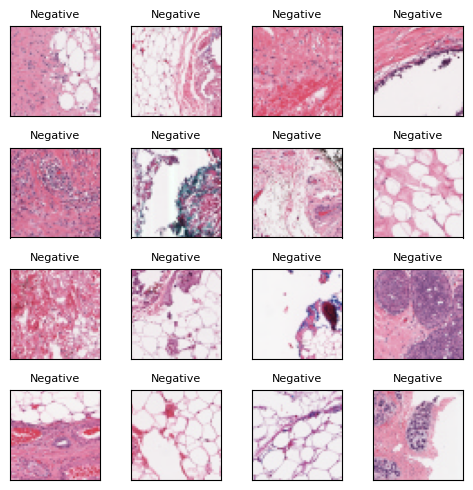

In [ ]:
# Create subplots
fig, ax = plt.subplots(4, 4, figsize=(5, 5))

for i in range(4):
    for j in range(4):
        idx = neg_selection[j + 4 * i]
        image = imread(data.loc[idx, "path"])
        ax[i, j].imshow(image)
        ax[i, j].grid(False)
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        ax[i, j].set_title('Negative', fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Visualize the breast tissue

This part is a bit challenging! We need to extract the coordinates of image patches embedded in the image names. These coordinates allow us to reconstruct the entire breast tissue of a patient. This reconstruction helps us compare diseased tissue with healthy tissue. To streamline this process, let's write a method that takes a patient ID and returns a DataFrame containing the coordinates and targets.

### Extracting X and Y Coordinates from Breast Tissue

In [ ]:
def extract_coords(df):
    # Extract x and y coordinates from the path
    coords = df['path'].str.extract(r'x(\d+)_y(\d+)', expand=True).astype(int)
    df['x'], df['y'] = coords[0], coords[1]
    return df

def get_cancer_dataframe(patient_id, cancer_id):
    path = f"{base_path}/{patient_id}/{cancer_id}"
    files = listdir(path)
    paths = [f"{path}/{file}" for file in files]

    # Create DataFrame with extracted coordinates and target
    df = pd.DataFrame({
        'filename': files,
        'path': paths,
        'target': int(cancer_id)
    })

    return extract_coords(df)

def get_patient_dataframe(patient_id):
    df_0 = get_cancer_dataframe(patient_id, "0")
    df_1 = get_cancer_dataframe(patient_id, "1")
    return pd.concat([df_0, df_1], ignore_index=True)

Extract Coordinates with str.extract: Used a single regex extraction to get the x and y coordinates directly from the path.
Formatted Paths with List Comprehension: Created the full paths using list comprehension for simplicity.
Removed Redundant Renaming and Dropping: Since the regex directly extracts the coordinates, there's no need for intermediate steps like dropping and renaming.
Concatenation with pd.concat: Used pd.concat for combining DataFrames instead of append, which is more efficient for this use case.

In [ ]:
patient_id = data['patient_id'].values[0]
example = get_patient_dataframe(patient_id)
example.head()

,filename,path,target,x,y
0,16570_idx5_x601_y701_class0.png,/content/dataset/IDC_regular_ps50_idx5//16570/...,0,601,701
1,16570_idx5_x2351_y1701_class0.png,/content/dataset/IDC_regular_ps50_idx5//16570/...,0,2351,1701
2,16570_idx5_x1901_y1451_class0.png,/content/dataset/IDC_regular_ps50_idx5//16570/...,0,1901,1451
3,16570_idx5_x751_y801_class0.png,/content/dataset/IDC_regular_ps50_idx5//16570/...,0,751,801
4,16570_idx5_x1401_y601_class0.png,/content/dataset/IDC_regular_ps50_idx5//16570/...,0,1401,601


### Visualizing Breast Cancer Tissue Coordinates for Multiple Patients

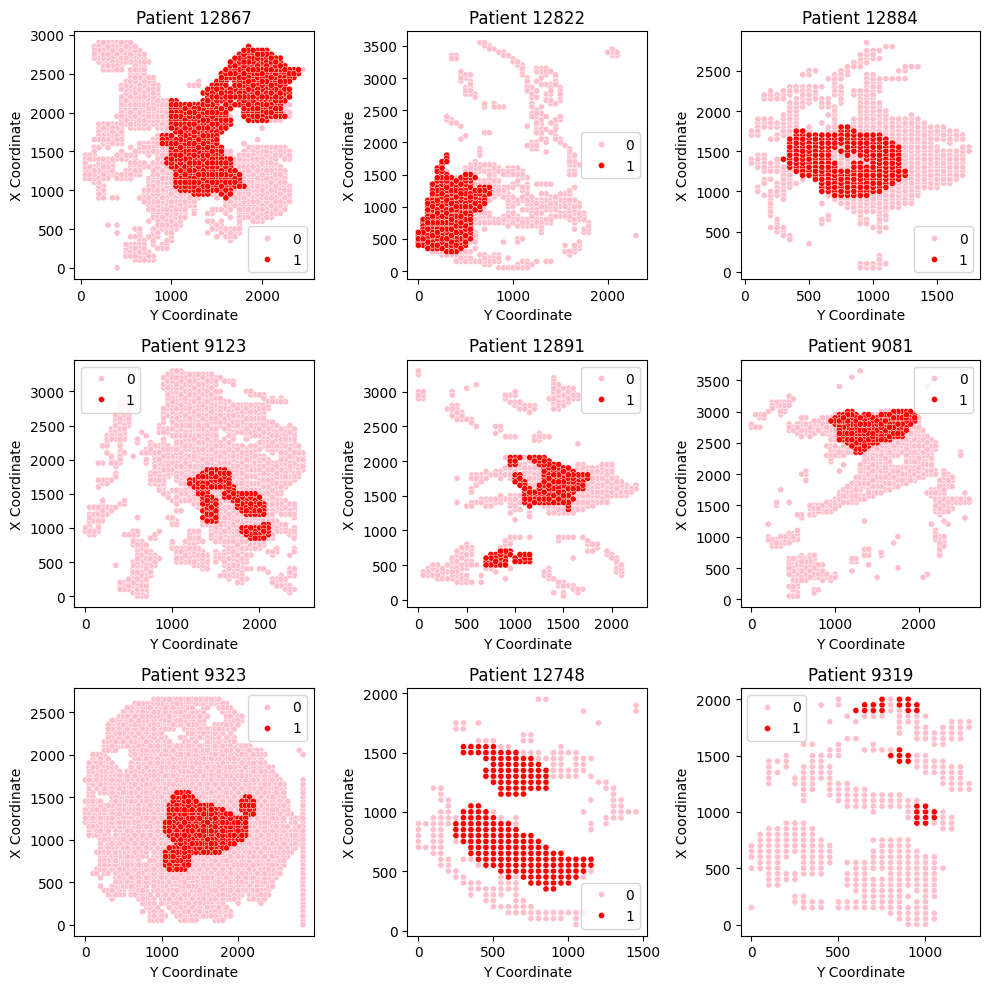

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))

# Get unique patient IDs
patient_ids = data['patient_id'].unique()

# Plot data for each patient
for i in range(3):
    for j in range(3):
        patient_id = patient_ids[j + 3 * i]
        example_df = get_patient_dataframe(patient_id)

        sns.scatterplot(
            x=example_df['y'].values,
            y=example_df['x'].values,
            hue=example_df['target'].values,
            palette=["pink", "red"],  # Change palette to include pink and red
            ax=ax[i, j],
            s=20
        )
        ax[i, j].set_title(f"Patient {patient_id}")
        ax[i, j].set_xlabel("Y Coordinate")
        ax[i, j].set_ylabel("X Coordinate")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### Visualizing Breast Cancer Tissue Coordinates for  Patient 12880

In [ ]:
def visualise_breast_tissue(patient_id, pred_df=None):
    example_df = get_patient_dataframe(patient_id)
    max_x = example_df['x'].max()
    max_y = example_df['y'].max()

    grid = np.ones((max_y + 50, max_x + 50, 3), dtype=np.uint8) * 255
    mask = np.ones((max_y + 50, max_x + 50, 3), dtype=np.uint8) * 255
    mask_proba = np.zeros((max_y + 50, max_x + 50, 1), dtype=float)  # Use float instead of np.float

    if pred_df is not None:
        patient_df = pred_df[pred_df['patient_id'] == patient_id].copy()

    broken_patches = []

    for index, row in example_df.iterrows():
        try:
            image = imread(row['path'])
            x_start, y_start = row['x'] - 1, row['y'] - 1
            x_end, y_end = x_start + 50, y_start + 50

            grid[y_start:y_end, x_start:x_end] = image

            if row['target'] == 1:
                mask[y_start:y_end, x_start:x_end, 0] = 250
                mask[y_start:y_end, x_start:x_end, 1] = 0
                mask[y_start:y_end, x_start:x_end, 2] = 0

            if pred_df is not None:
                proba = patient_df[(patient_df['x'] == row['x']) & (patient_df['y'] == row['y'])]['proba'].values
                mask_proba[y_start:y_end, x_start:x_end, 0] = float(proba)

        except ValueError:
            broken_patches.append(row['path'])

    return grid, mask, broken_patches, mask_proba


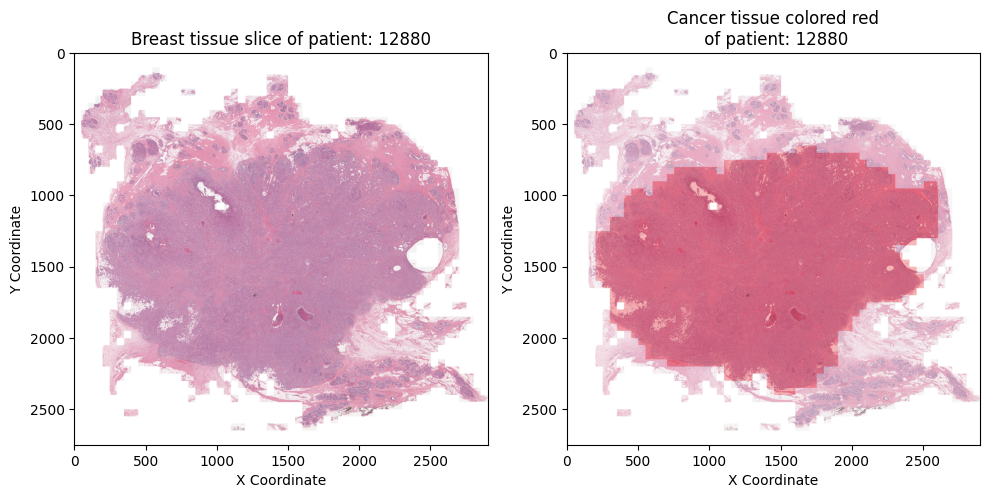

In [ ]:
example = "12880"

# Visualize breast tissue
grid, mask, broken_patches, _ = visualise_breast_tissue(example)

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 10))

# Plot grid (original image) on the first subplot
ax[0].imshow(grid, alpha=0.9)
ax[0].grid(False)
ax[0].set_xlabel("X Coordinate")
ax[0].set_ylabel("Y Coordinate")
ax[0].set_title(f"Breast tissue slice of patient: {example}")

# Plot mask (cancer tissue highlighted in red) on the second subplot
ax[1].imshow(mask, alpha=0.8)
ax[1].imshow(grid, alpha=0.7)
ax[1].grid(False)
ax[1].set_xlabel("X Coordinate")
ax[1].set_ylabel("Y Coordinate")
ax[1].set_title(f"Cancer tissue colored red\n of patient: {example}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

## Modeling Using CNN:

### Distribution of Target Variable

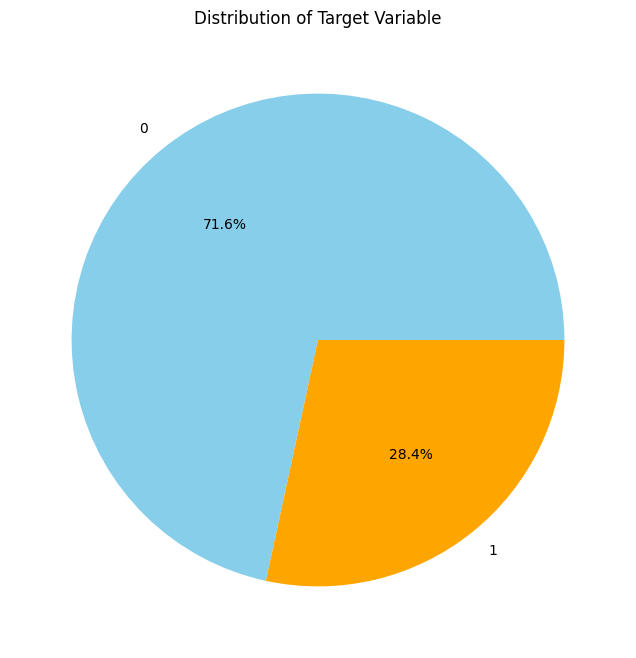

In [10]:
# Count the occurrences of each target value
target_counts = data['target'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%', colors=["skyblue", "orange"])
plt.title('Distribution of Target Variable')
plt.show()

### Extract balanced data from our dataset

In [ ]:
# Number of positive examples
num_positive = 78786

# Extract positive examples
positive_examples = data[data['target'] == 1]

# Randomly sample negative examples to match the number of positive examples
negative_examples = data[data['target'] == 0].sample(n=num_positive, random_state=42)

# Combine positive and negative examples
df = pd.concat([positive_examples, negative_examples])

# Shuffle the new DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Print the counts to verify
print(df['target'].value_counts())

target
1    78786
0    78786
Name: count, dtype: int64


In [ ]:

df.head()
df.shape

(157572, 3)

### Creating a new DataFrame with columns for PNG images

In [ ]:
import os
import shutil

folder_path = '/content/dataset/train_images/'

# Check if the directory exists
if os.path.exists(folder_path):
    # Delete all files and subdirectories inside 'train_images'
    shutil.rmtree(folder_path)
    print(f"Deleted the directory: {folder_path}")
else:
    print(f"The directory does not exist: {folder_path}")

# Create the directory
os.makedirs(folder_path)
print(f"Created the directory: {folder_path}")

The directory does not exist: /content/dataset/train_images/
Created the directory: /content/dataset/train_images/


In [ ]:
import shutil

# Define the directory path
#folder_path = '/content/dataset/train_images/'

# Delete all files and subdirectories inside 'train_images'
#shutil.rmtree(folder_path)

In [ ]:
train_path = '/content/dataset/train_images/'

# Create the new folder if it doesn't exist
if not os.path.exists(train_path):
    os.makedirs(train_path)

# Iterate through each row in the DataFrame and copy images to the new folder
for index, row in df.iterrows():
    image_path = row['path']
    image_name = os.path.basename(image_path)  # Extracts the filename from the path
    target_folder = os.path.join(train_path, image_name)

    # Copy the image to the new folder
    shutil.copy(image_path, target_folder)
   # print(f"Copied {image_name} to {target_folder}")

print("Images copied successfully!")

In [ ]:
# Initialize lists to store image filenames and classes
# Path to the folder containing images
folder_path = '/content/dataset/train_images/'
image_filenames = []
classes = []

# Iterate through files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.png'):  # Ensure we only process PNG files
        # Extract class from filename
        class_label = int(filename.split('_')[-1].split('.')[0].replace('class', ''))

        # Append image filename and class to lists
        image_filenames.append(filename)
        classes.append(class_label)

# Create DataFrame
df_images = pd.DataFrame({
    'image_filename': image_filenames,
    'class': classes
})

# Display the DataFrame (optional)
#print(df)

In [ ]:
df_images.head()
#df_images.shape

,image_filename,class
0,16553_idx5_x851_y1201_class1.png,1
1,12826_idx5_x1251_y1051_class0.png,0
2,16568_idx5_x1701_y1051_class1.png,1
3,14081_idx5_x2401_y351_class1.png,1
4,15510_idx5_x2451_y1401_class1.png,1


### Split the Data

In [ ]:
train_df, val_df = train_test_split(df_images, test_size=0.1, random_state=1, stratify=df.target)

# Getting the shape of train_df and val_df
train_shape = train_df.shape
val_shape = val_df.shape

print("Train DataFrame Shape:", train_df.shape)
print("Validation DataFrame Shape:", val_df.shape)

Train DataFrame Shape: (141814, 2)
Validation DataFrame Shape: (15758, 2)


In [ ]:
# Define batch size
BATCH_SIZE = 64

# Define base directory where images are stored
train_path = '/content/dataset/train_images/'

train_df['class'] = train_df['class'].astype(str)
# Define ImageDataGenerator with rescaling
datagen = ImageDataGenerator(rescale=1.0/255)

# Train generator
train_loader = datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_path,  # Since 'filename' already contains full paths
    x_col='image_filename',
    y_col='class',
    batch_size=BATCH_SIZE,
    seed=1,
    shuffle=True,
    class_mode='categorical',
    target_size=(50, 50)
)
val_df['class'] = val_df['class'].astype(str)
# Define valid_loader
valid_loader = datagen.flow_from_dataframe(
    dataframe = val_df,
    directory = train_path,
    x_col = 'image_filename',
    y_col = 'class',
    batch_size = BATCH_SIZE,
    seed = 1,
    shuffle = True,
        class_mode = 'categorical',
    target_size = (50,50)
)


Found 141814 validated image filenames belonging to 2 classes.
Found 15758 validated image filenames belonging to 2 classes.


## Calculating Training and Validation Steps

In [ ]:
train_steps = len(train_loader)
val_steps = len(valid_loader)

print(train_steps)
print(val_steps)

2216
247


## Convolutional Neural Network Architecture.

##  The base model

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(50, 50, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

base_model.summary()

## Add custom layers on top of the base model:

In [ ]:
np.random.seed(1)
tf.random.set_seed(1)

cnn = Sequential([
    base_model,  # Using the base model defined earlier
    BatchNormalization(),
    Flatten(),
    Dense(8, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(2, activation='softmax')
])

cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 2, 2, 1280)        2257984   
 tional)                                                         
                                                                 
 batch_normalization (Batch  (None, 2, 2, 1280)        5120      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 8)                 40968     
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 3

In [ ]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy', tf.keras.metrics.AUC()])

In [ ]:
%%time

h1 = cnn.fit(
    x = train_loader,
    steps_per_epoch = train_steps,
    epochs = 40,
    validation_data = valid_loader,
    validation_steps = val_steps,
    verbose = 1
)

Epoch 1/40
2216/2216 [==============================] - 139s 63ms/step - loss: 0.6421 - accuracy: 0.6402 - auc: 0.7125 - val_loss: 0.4981 - val_accuracy: 0.7803 - val_auc: 0.8596
Epoch 2/40
2216/2216 [==============================] - 100s 45ms/step - loss: 0.5853 - accuracy: 0.6774 - auc: 0.7637 - val_loss: 0.4825 - val_accuracy: 0.7881 - val_auc: 0.8690
Epoch 3/40
2216/2216 [==============================] - 90s 41ms/step - loss: 0.5670 - accuracy: 0.6938 - auc: 0.7809 - val_loss: 0.4789 - val_accuracy: 0.7926 - val_auc: 0.8723
Epoch 4/40
2216/2216 [==============================] - 93s 42ms/step - loss: 0.5590 - accuracy: 0.7003 - auc: 0.7885 - val_loss: 0.4788 - val_accuracy: 0.7933 - val_auc: 0.8739
Epoch 5/40
2216/2216 [==============================] - 92s 42ms/step - loss: 0.5553 - accuracy: 0.7026 - auc: 0.7914 - val_loss: 0.4761 - val_accuracy: 0.7930 - val_auc: 0.8739
Epoch 6/40
2216/2216 [==============================] - 90s 40ms/step - loss: 0.5492 - accuracy: 0.7097 - au

## The Model's Performance


In [ ]:
def merge_history(hlist):
    history = {}
    for k in hlist[0].history.keys():
        history[k] = sum([h.history[k] for h in hlist], [])
    return history

def vis_training(h, start=1):
    epoch_range = range(start, len(h['loss'])+1)
    s = slice(start-1, None)

    plt.figure(figsize=[14,4])

    n = int(len(h.keys()) / 2)

    for i in range(n):
        k = list(h.keys())[i]
        plt.subplot(1,n,i+1)
        plt.plot(epoch_range, h[k][s], label='Training')
        plt.plot(epoch_range, h['val_' + k][s], label='Validation')
        plt.xlabel('Epoch'); plt.ylabel(k); plt.title(k)
        plt.grid()
        plt.legend()

    plt.tight_layout()
    plt.show()

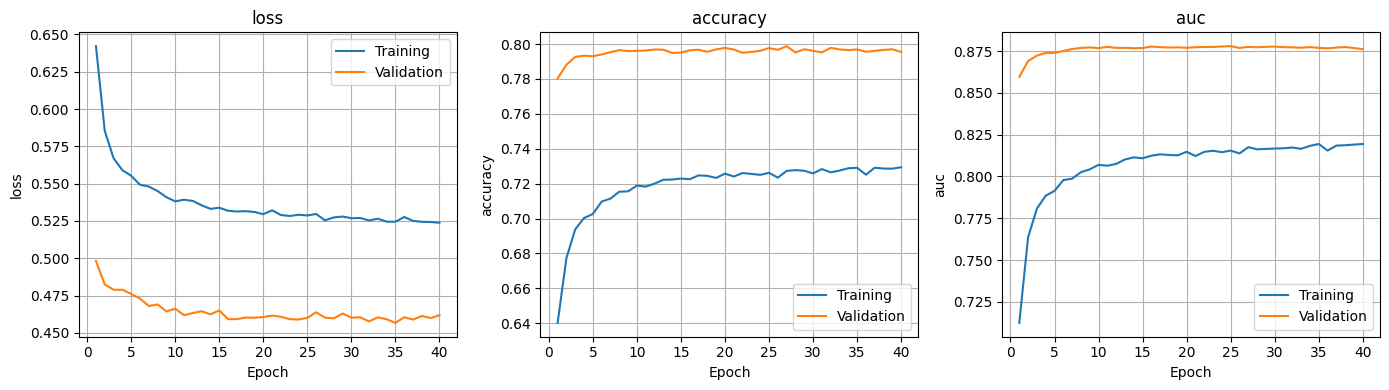

In [ ]:
history = merge_history([h1])
vis_training(history)

In [ ]:
from tensorflow.keras import backend as k
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
base_model.trainable = True
k.set_value(cnn.optimizer.learning_rate, 0.00001)
cnn.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', tf.keras.metrics.AUC()])

In [ ]:
%%time

h2 = cnn.fit(
    x = train_loader,
    steps_per_epoch = train_steps,
    epochs = 20,
    validation_data = valid_loader,
    validation_steps = val_steps,
    verbose = 1
)

Epoch 1/20
2216/2216 [==============================] - 180s 64ms/step - loss: 0.5285 - accuracy: 0.7299 - auc_1: 0.8209 - val_loss: 0.3952 - val_accuracy: 0.8273 - val_auc_1: 0.9041
Epoch 2/20
2216/2216 [==============================] - 138s 62ms/step - loss: 0.4879 - accuracy: 0.7512 - auc_1: 0.8472 - val_loss: 0.3826 - val_accuracy: 0.8397 - val_auc_1: 0.9104
Epoch 3/20
2216/2216 [==============================] - 142s 64ms/step - loss: 0.4768 - accuracy: 0.7554 - auc_1: 0.8538 - val_loss: 0.3432 - val_accuracy: 0.8507 - val_auc_1: 0.9279
Epoch 4/20
2216/2216 [==============================] - 139s 63ms/step - loss: 0.4675 - accuracy: 0.7586 - auc_1: 0.8582 - val_loss: 0.3406 - val_accuracy: 0.8586 - val_auc_1: 0.9303
Epoch 5/20
2216/2216 [==============================] - 139s 63ms/step - loss: 0.4616 - accuracy: 0.7607 - auc_1: 0.8615 - val_loss: 0.3283 - val_accuracy: 0.8623 - val_auc_1: 0.9344
Epoch 6/20
2216/2216 [==============================] - 137s 62ms/step - loss: 0.4530

In [ ]:
print(h1.history.keys())
print(h2.history.keys())

dict_keys(['loss', 'accuracy', 'auc', 'val_loss', 'val_accuracy', 'val_auc'])
dict_keys(['loss', 'accuracy', 'auc_1', 'val_loss', 'val_accuracy', 'val_auc_1'])


In [ ]:
h2.history['auc'] = h2.history['auc_1']
h2.history['val_auc'] = h2.history['val_auc_1']

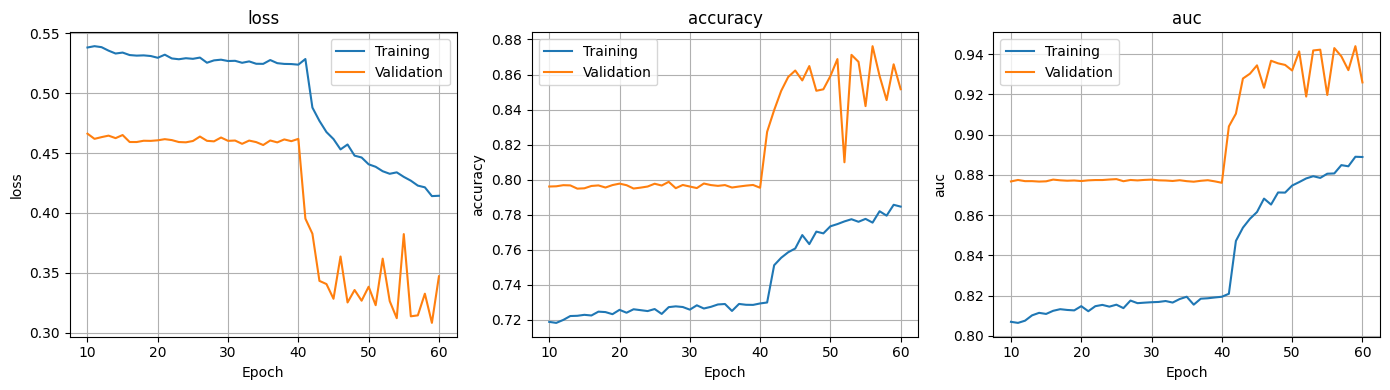

In [ ]:
history = merge_history([h1, h2])
vis_training(history, start=10)

## Tuning Parameters

In [ ]:
%%time

h3 = cnn.fit(
    x = train_loader,
    steps_per_epoch = train_steps,
    epochs = 20,
    validation_data = valid_loader,
    validation_steps = val_steps,
    verbose = 1
)

Epoch 1/20
2216/2216 [==============================] - 146s 66ms/step - loss: 0.4087 - accuracy: 0.7873 - auc_1: 0.8915 - val_loss: 0.3152 - val_accuracy: 0.8700 - val_auc_1: 0.9428
Epoch 2/20
2216/2216 [==============================] - 145s 65ms/step - loss: 0.4108 - accuracy: 0.7851 - auc_1: 0.8902 - val_loss: 0.3096 - val_accuracy: 0.8639 - val_auc_1: 0.9413
Epoch 3/20
2216/2216 [==============================] - 141s 64ms/step - loss: 0.4036 - accuracy: 0.7879 - auc_1: 0.8930 - val_loss: 0.3015 - val_accuracy: 0.8797 - val_auc_1: 0.9451
Epoch 4/20
2216/2216 [==============================] - 141s 64ms/step - loss: 0.4012 - accuracy: 0.7906 - auc_1: 0.8950 - val_loss: 0.3019 - val_accuracy: 0.8816 - val_auc_1: 0.9468
Epoch 5/20
2216/2216 [==============================] - 139s 63ms/step - loss: 0.3978 - accuracy: 0.7922 - auc_1: 0.8967 - val_loss: 0.3104 - val_accuracy: 0.8791 - val_auc_1: 0.9437
Epoch 6/20
2216/2216 [==============================] - 140s 63ms/step - loss: 0.3987

In [ ]:
print(h3.history.keys())

dict_keys(['loss', 'accuracy', 'auc_1', 'val_loss', 'val_accuracy', 'val_auc_1', 'auc', 'val_auc'])


## **Conclusion:**

* By using this architecture (base model + custom layers), we achieved an accuracy of 0.73 and 0.97 for training and validation, respectively, with an AUC of 0.83 and 0.88 for training and validation, respectively.
* By tuning the parameters and setting base_model.trainable to true, we achieved accuracies of 0.87 and 0.97 for training and validation, respectively, with AUCs of 0.88 and 0.94, respectively.
* Using this architecture, I was able to eliminate overfitting. I experimented with different CNN architectures, most of which performed well on training data but not on validation data.